In [1]:
import numpy as np
from numpy.core.numeric import True_
import time
import matplotlib.pyplot as plt
import sys
import math
import pickle

import sys
sys.path.insert(0,'..')
import get_cup_dataset as dt
from SVR import SVR

In [2]:
six = {}
seven = {}
fifteen = {}
sixteen = {}
seventeen = {}

with open("..\gs_models\gs_poly_2_6", "rb") as f:
    six = pickle.load(f)['model']
with open("..\gs_models\gs_poly_2_7", "rb") as f:
    seven = pickle.load(f)['model']
with open("..\gs_models\gs_poly_2_15", "rb") as f:
    fifteen = pickle.load(f)['model']
with open("..\gs_models\gs_poly_2_16", "rb") as f:
    sixteen = pickle.load(f)['model']
with open("..\gs_models\gs_poly_2_17", "rb") as f:
    seventeen = pickle.load(f)['model']

In [3]:
def plot_single_model(cup_model, fstar, axs, color, label):
    plot_conv_rate = []
    residual_error = []
    log_residual_error = []
    for i in range(len(cup_model.history['f']) - 1):
        if i < len(cup_model.history['f']) - 500:
            plot_conv_rate.append((cup_model.history['f'][i+1] - fstar) / (cup_model.history['f'][i] - fstar))
        log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
        residual_error.append(np.abs(fstar - cup_model.history['f'][i]) / np.abs(fstar))
    axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, label=label, color=color)
    axs[0].set_ylabel("CONV_RATE")
    axs[1].plot(range(len(log_residual_error)), log_residual_error, label=label, color=color)
    axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
    axs[2].plot(range(len(residual_error)), residual_error, label=label, color=color)
    axs[2].set_ylabel("RESIDUAL_ERROR")
    axs[0].set_ylim(0.5, 1.5)
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()

    return plot_conv_rate, log_residual_error, residual_error

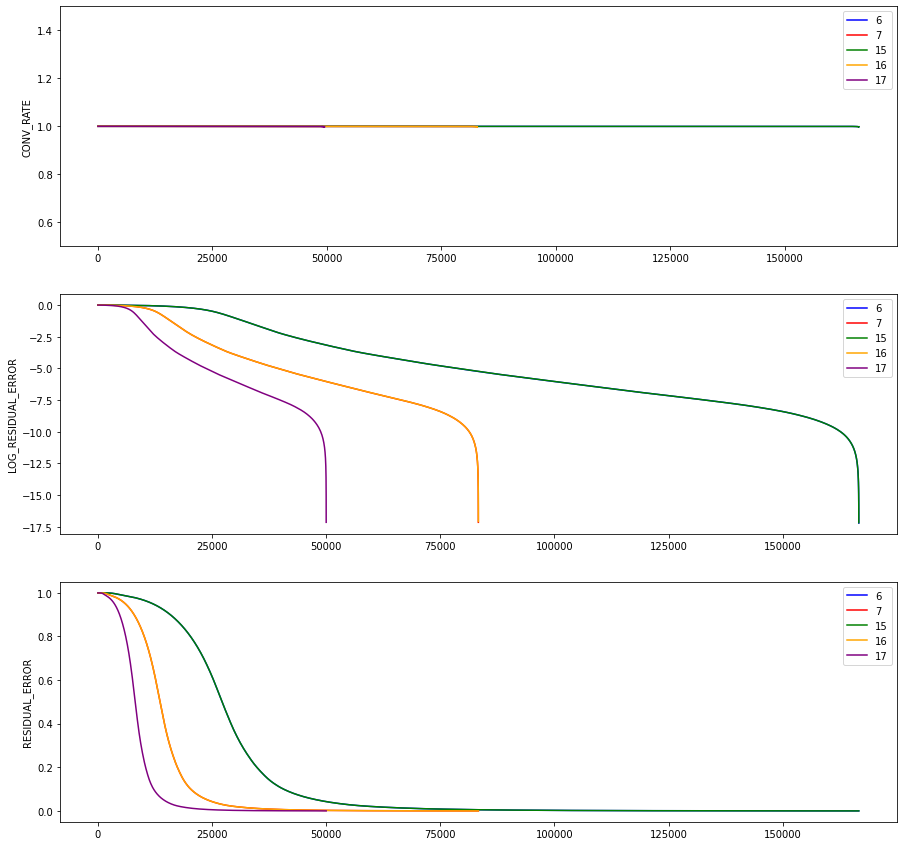

In [4]:
fstar = -31723.1799200109 # 50k model number 17
fig, axs = plt.subplots(3, figsize=(15,15))
colors = ['blue', 'red', 'green', 'orange', 'purple']
six_conv, six_logres, six_res = plot_single_model(six, fstar, axs, colors[0], '6')
seven_conv, seven_logres, seven_res = plot_single_model(seven, fstar, axs, colors[1], '7')
fifteen_conv, fifteen_logres, fifteen_res = plot_single_model(fifteen, fstar, axs, colors[2], '15')
sixteen_conv, sixteen_logres, sixteen_res = plot_single_model(sixteen, fstar, axs, colors[3], '16')
seventeen_conv, seventeen_logres, seventeen_res = plot_single_model(seventeen, fstar, axs, colors[4], '17')
plt.show()

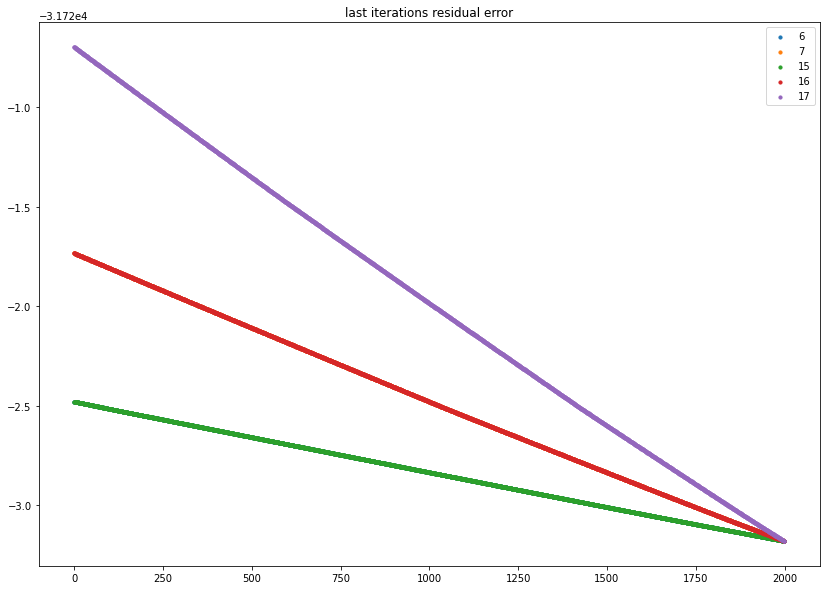

In [5]:
len_plot = 2000
scatter_size = 10
fig, ax = plt.subplots(figsize=(14,10))
plt.scatter(range(len_plot), six.history['f'][-len_plot:], label='6', s=scatter_size)
plt.scatter(range(len_plot), seven.history['f'][-len_plot:], label='7', s=scatter_size)
plt.scatter(range(len_plot), fifteen.history['f'][-len_plot:], label='15', s=scatter_size)
plt.scatter(range(len_plot), sixteen.history['f'][-len_plot:], label='16', s=scatter_size)
plt.scatter(range(len_plot), seventeen.history['f'][-len_plot:], label='17', s=scatter_size)
plt.legend()
plt.title('last iterations residual error')
plt.show()

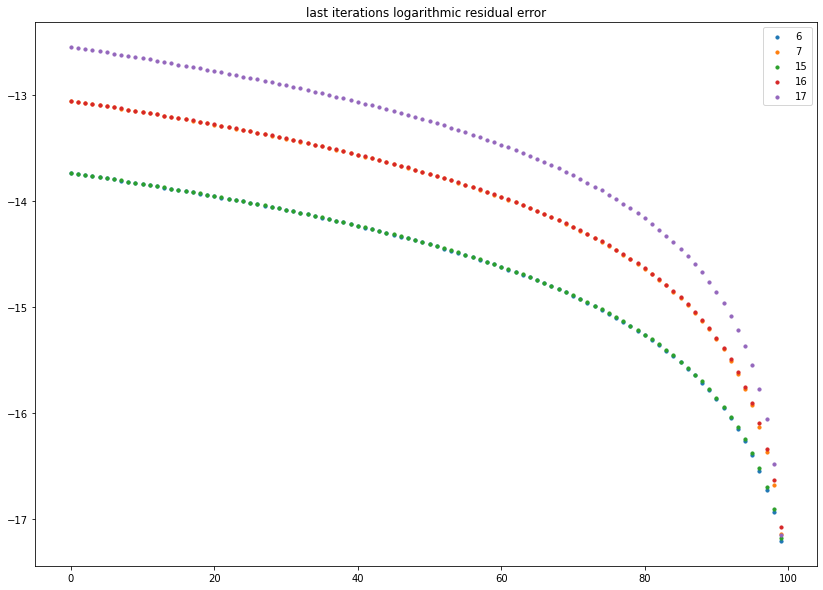

In [6]:
len_plot = 100
scatter_size = 10
fig, ax = plt.subplots(figsize=(14,10))
plt.scatter(range(len_plot), six_logres[-len_plot:], label='6', s=scatter_size)
plt.scatter(range(len_plot), seven_logres[-len_plot:], label='7', s=scatter_size)
plt.scatter(range(len_plot), fifteen_logres[-len_plot:], label='15', s=scatter_size)
plt.scatter(range(len_plot), sixteen_logres[-len_plot:], label='16', s=scatter_size)
plt.scatter(range(len_plot), seventeen_logres[-len_plot:], label='17', s=scatter_size)
plt.title('last iterations logarithmic residual error')
plt.legend()
plt.show()

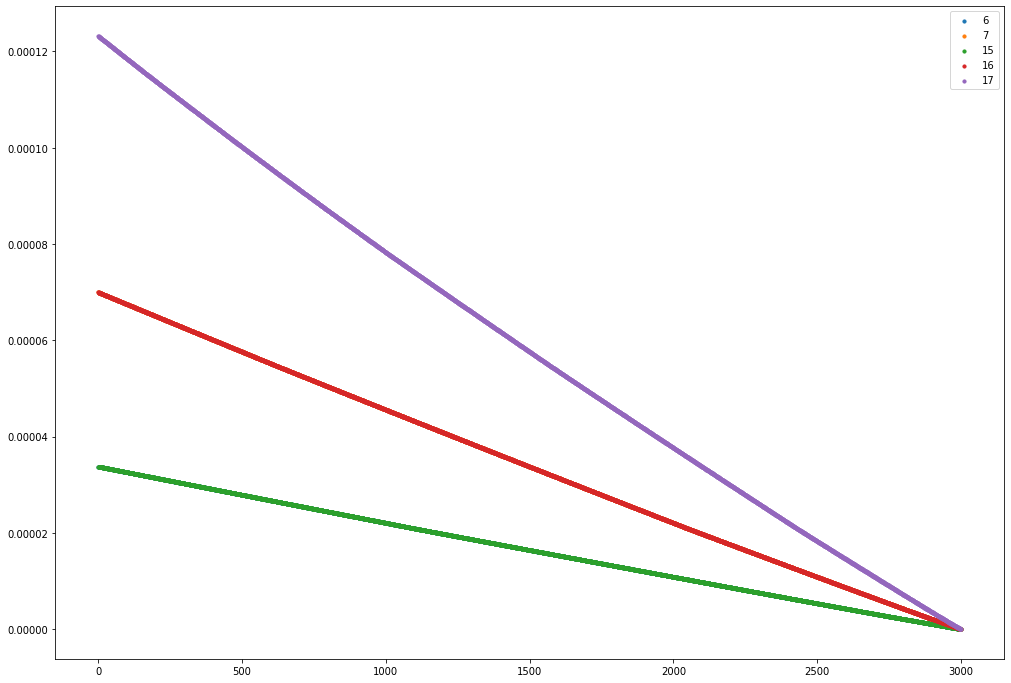

In [7]:
len_plot = 3000
scatter_size = 10
fig, ax = plt.subplots(figsize=(17,12))
plt.scatter(range(len_plot), six_res[-len_plot:], label='6', s=scatter_size)
plt.scatter(range(len_plot), seven_res[-len_plot:], label='7', s=scatter_size)
plt.scatter(range(len_plot), fifteen_res[-len_plot:], label='15', s=scatter_size)
plt.scatter(range(len_plot), sixteen_res[-len_plot:], label='16', s=scatter_size)
plt.scatter(range(len_plot), seventeen_res[-len_plot:], label='17', s=scatter_size)
plt.legend()
plt.show()